In [1]:
from classif import *

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [2]:
# Classifier models
svm = SVC(random_state=0, kernel='linear', C=0.1, probability=True)
xgbooster = xgb.XGBClassifier(random_state=0, n_estimators=150, n_jobs=8)
mlp = MLPClassifier(random_state=0, max_iter=1000, solver="adam", alpha=0.1)
knn = KNeighborsClassifier(n_neighbors=7)

In [3]:
def run_classification_experiment(X, Y, min_rows_per_label=0):
    # Test the given dataset's classifiability for four models
    run_cv_trials(svm, X, Y, folds=5)
    run_cv_trials(xgbooster, X, np.unique(Y, return_inverse=True)[1], folds=5)
    run_cv_trials(mlp, X, Y, folds=5)
    run_cv_trials(knn, X, Y, folds=5)

In [4]:
def run_clustering_experiment(X, Y):
    # Evaluate accuracy of an unsupervised clustering of the given dataset
    n_clusters = len(np.unique(Y))
    algos = [
        KMeans(n_clusters=n_clusters, random_state=0),
        AgglomerativeClustering(n_clusters=n_clusters),
        SpectralClustering(n_clusters=n_clusters)
    ]
    for algo in algos:
        print("Method:", algo)
        clus = algo.fit(X, Y)
        print("rand:   %.3f" % adjusted_rand_score(Y, clus.labels_))
        print("minf:   %.3f" % adjusted_mutual_info_score(Y, clus.labels_))

In [5]:
def run_all_experiments_on_dataset(dataset_csv, do_clustering=True, min_rows_per_label=0):
    X, Y = load_mat(dataset_csv)
    Xn = normalize(X)
    print("--- Classification ---")
    run_classification_experiment(Xn, Y, min_rows_per_label=min_rows_per_label)
    if do_clustering:
        print("--- Clustering ---")
        run_clustering_experiment(Xn, Y)

In [6]:
run_all_experiments_on_dataset("1mm_fifteen_species.csv")

--- Classification ---
Model: SVC(C=0.1, kernel='linear', probability=True, random_state=0)
avg:   71.6%
std:   2.9%
Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=150, n_jobs=8,
              num_parallel_tree=None, predictor=None, random_state=0,
              reg_alpha=None, reg_lambda=None, ...)
avg:   68.7%
std:   2.4%
Model: MLPClassifier(alpha=0.1, max_iter=1000, random_state=0)
avg:   69.3%
std:   2.8%
Model: KNeighborsClassifier(

In [7]:
run_all_experiments_on_dataset("1mm_seven_genera.csv")

--- Classification ---
Model: SVC(C=0.1, kernel='linear', probability=True, random_state=0)
avg:   91.0%
std:   1.4%
Model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=8, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
avg:   88.6%
std:   3.0%
Model: MLPClassifier(alpha=0.1, max_iter=1000, random_state=0)
avg:   90.3%
std:   2.4%
Model: KNeighborsClassifier(n_neighbors=7)
avg:   

In [8]:
run_all_experiments_on_dataset("1mm_aug_seven_genera.csv", do_clustering=False)

--- Classification ---
Model: SVC(C=0.1, kernel='linear', probability=True, random_state=0)
avg:   91.9%
std:   2.2%
Model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=8, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
avg:   90.0%
std:   2.3%
Model: MLPClassifier(alpha=0.1, max_iter=1000, random_state=0)
avg:   91.2%
std:   1.9%
Model: KNeighborsClassifier(n_neighbors=7)
avg:   

In [9]:
run_all_experiments_on_dataset("1mm_aug_seven_genera.csv", min_rows_per_label=500, do_clustering=False)

--- Classification ---
Model: SVC(C=0.1, kernel='linear', probability=True, random_state=0)
avg:   91.9%
std:   2.2%
Model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=8, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
avg:   90.0%
std:   2.3%
Model: MLPClassifier(alpha=0.1, max_iter=1000, random_state=0)
avg:   91.2%
std:   1.9%
Model: KNeighborsClassifier(n_neighbors=7)
avg:   

In [10]:
def run_in_depth_classification_experiment(dataset_csv, clf):
    X, Y = load_mat(dataset_csv)
    Xn = normalize(X)
    show_confusion_mat(clf, Xn, Y)
    run_cv_trials(clf, Xn, Y, folds=5, score=f1_scorer)
    run_cv_trials(clf, Xn, Y, folds=5, score=precision_scorer)
    run_cv_trials(clf, Xn, Y, folds=5, score=recall_scorer)

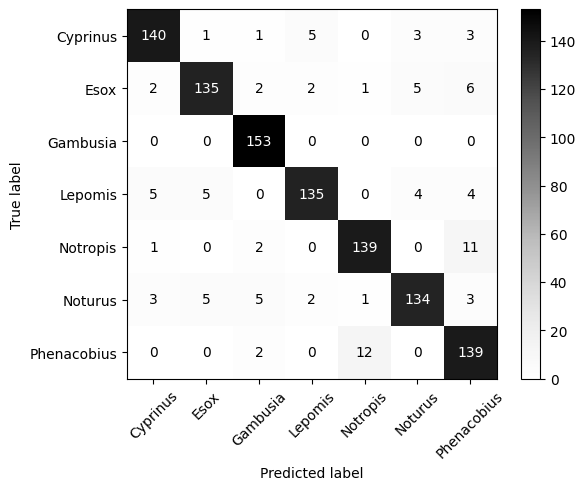

Model: SVC(C=0.1, kernel='linear', probability=True, random_state=0)
avg:   91.2%
std:   1.5%
Model: SVC(C=0.1, kernel='linear', probability=True, random_state=0)
avg:   91.8%
std:   1.2%
Model: SVC(C=0.1, kernel='linear', probability=True, random_state=0)
avg:   91.2%
std:   1.6%


In [11]:
run_in_depth_classification_experiment("1mm_seven_genera.csv", svm)